In [14]:
import pandas as pd

# Attempt to load the data using UTF-16 encoding, which may resolve encoding issues
variables_df = pd.read_csv('../data/variables_res-soft-class_2024-10-31_21-58.csv', delimiter=';', encoding='utf-16')
data_df = pd.read_csv('../data/data_res-soft-class_2024-10-31_21-46.csv', delimiter=';', encoding='utf-16')
values_df = pd.read_csv('../data/values_res-soft-class_2024-10-31_21-58.csv', delimiter=';', encoding='utf-16')

# Displaying the first few rows of each DataFrame to verify successful loading
variables_df.head() 
 

,VAR,LABEL,TYPE,INPUT,QUESTION
0,CASE,Interview-Nummer (fortlaufend),METRIC,SYSTEM,NaN
1,SERIAL,Personenkennung oder Teilnahmecode (sofern ver...,TEXT,SYSTEM,NaN
2,REF,Referenz (sofern im Link angegeben),TEXT,SYSTEM,NaN
3,QUESTNNR,"Fragebogen, der im Interview verwendet wurde",TEXT,SYSTEM,NaN
4,MODE,Interview-Modus,TEXT,SYSTEM,NaN


In [15]:
data_df.head()

,CASE,SERIAL,REF,QUESTNNR,MODE,STARTED,R001_CN,R001x01,R001x11,R001x12,...,TIME_SUM,MAILSENT,LASTDATA,FINISHED,Q_VIEWER,LASTPAGE,MAXPAGE,MISSING,MISSREL,TIME_RSI
0,63,NaN,NaN,base,interview,2024-10-18 08:46:14,NaN,NaN,NaN,NaN,...,10,NaN,2024-10-18 08:46:24,0,0,1,1,0,0,"0,6"
1,68,NaN,NaN,base,interview,2024-10-18 09:30:17,NaN,NaN,NaN,NaN,...,174,NaN,2024-10-21 09:14:27,0,0,2,2,0,0,"0,38"
2,69,NaN,NaN,base,interview,2024-10-18 10:01:06,NaN,NaN,NaN,NaN,...,6,NaN,2024-10-18 10:01:12,0,0,1,1,0,0,1
3,70,NaN,NaN,base,interview,2024-10-18 10:02:52,1.0,2.0,2.0,1.0,...,632,NaN,2024-10-18 10:13:24,1,0,2,2,0,0,"1,13"
4,72,NaN,NaN,base,interview,2024-10-18 11:52:05,1.0,2.0,2.0,1.0,...,162,NaN,2024-10-18 11:54:47,1,0,2,2,0,0,"0,96"


In [16]:

values_df.head()


,VAR,RESPONSE,MEANING
0,R001x01,1,nicht gewählt
1,R001x01,2,ausgewählt
2,R001x11,1,nicht gewählt
3,R001x11,2,ausgewählt
4,R001x12,1,nicht gewählt


In [17]:

category_columns = [col for col in data_df.columns if col.startswith('R001x')]



# Initialize a result dataframe to store each CASE, REF, and a list of categories marked as "2"

votes_summary = []



# Iterate over each row in the data to gather CASE, REF, and list of selected categories

for _, row in data_df.iterrows():

    case = row['CASE']

    ref = row['REF']

    selected_categories = []



    # Check each category column if it is marked with "2"

    for col in category_columns:

        if row[col] == 2:

            category_label = variables_labels.get(col, col)  # Get label if available, or fallback to column name

            selected_categories.append(category_label)



    # Append only if there are selected categories

    if selected_categories:

        votes_summary.append({

            'CASE': case,

            'REF': ref,

            'Selected_Categories': selected_categories

        })



# Convert the summary list into a DataFrame for easier display

votes_summary_df = pd.DataFrame(votes_summary)
votes_summary_df['DOI'] = data_df.set_index('CASE').loc[votes_summary_df['CASE'], 'R004_01'].values
votes_summary_df['Voter'] = data_df.set_index('CASE').loc[votes_summary_df['CASE'], 'R003'].values


votes_summary_df


,CASE,REF,Selected_Categories,DOI,Voter
0,70,NaN,"[Category: Modelling, Simulation and Data Anal...",10.21105/joss.07134,3
1,72,NaN,"[Category: Modelling, Simulation and Data Anal...",10.21105/joss.07134,9
2,73,NaN,"[Category: Modelling, Simulation and Data Anal...",10.21105/joss.06914,9
3,74,NaN,"[Category: Research Infrastructure Software, C...",10.21105/joss.06914,2
4,75,NaN,[Category: Technology Research Software],10.21105/joss.06825,2
...,...,...,...,...,...
238,399,NaN,"[Category: Modelling, Simulation and Data Anal...",10.21105/joss.02825,13
239,404,NaN,"[Category: Technology Research Software, Categ...",10.21105/joss.03465,13
240,405,NaN,"[Category: Modelling, Simulation and Data Anal...",10.21105/joss.03097,13
241,408,NaN,"[Category: Modelling, Simulation and Data Anal...",10.21105/joss.03097,1


In [19]:
# Identifying all unique category labels that start with 'R001x' and comparing with selected categories



# Step 1: Identify all category columns that start with 'R001x' in data_df

all_category_vars = [col for col in data_df.columns if col.startswith('R001x')]



# Step 2: Get the labels for all these category variables from variables_labels dictionary

all_category_labels = set(variables_labels.get(var, var) for var in all_category_vars)



# Step 3: Gather all selected categories in votes_summary_df

selected_category_labels = set(category for sublist in votes_summary_df['Selected_Categories'] for category in sublist)



# Step 4: Identify categories that are present in all categories but not in selected categories

unselected_categories = all_category_labels - selected_category_labels



# Convert the result to a DataFrame for easy viewing

unselected_categories_df = pd.DataFrame({'Unselected_Categories': list(unselected_categories)})

unselected_categories_df

,Unselected_Categories
0,Category: Collaboration and Publication Software
1,Category: Laboratory Notebooks
2,Category: Human Related


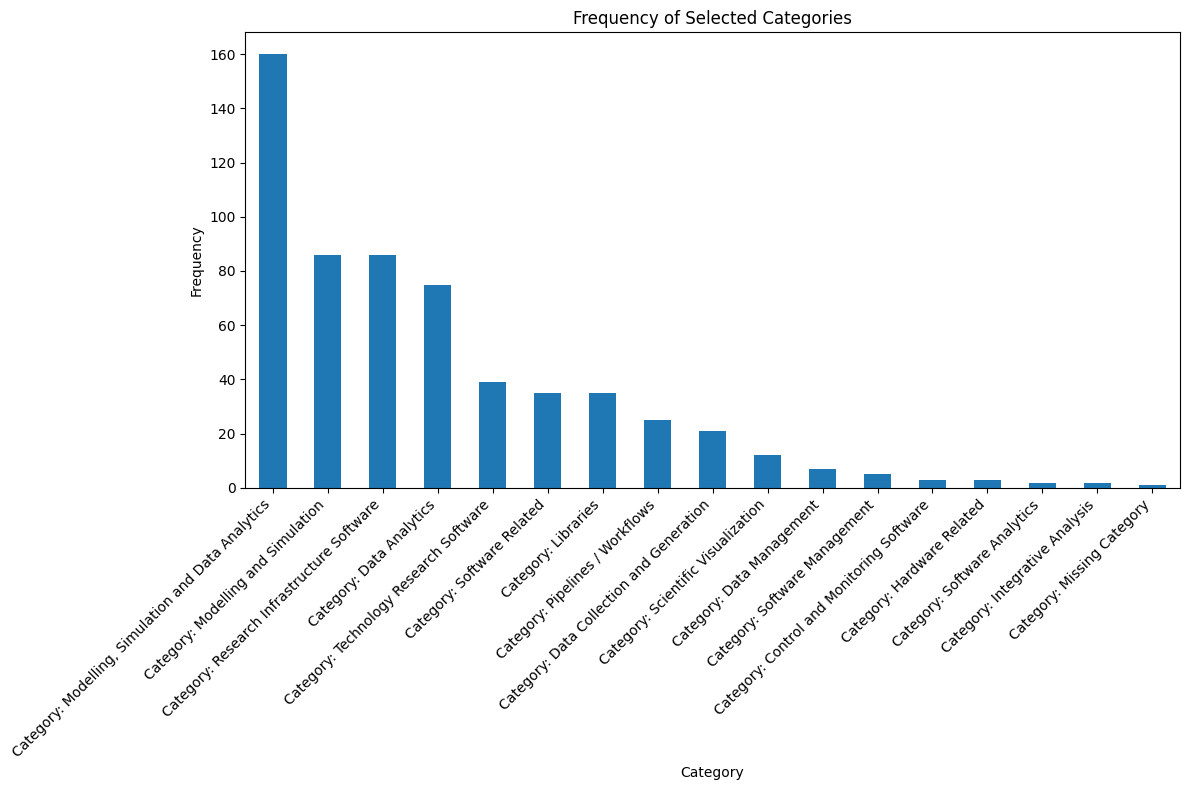

In [23]:
import matplotlib.pyplot as plt

# Flatten the list of selected categories for all votes and calculate frequency counts
all_selected_categories = [category for sublist in votes_summary_df['Selected_Categories'] for category in sublist]
selected_category_counts = pd.Series(all_selected_categories).value_counts()

# Re-plotting with English labels for clarity

# Plotting the frequency of each selected category
plt.figure(figsize=(12, 8))
selected_category_counts.plot(kind='bar')
plt.title('Frequency of Selected Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

